In [3]:
import pandas as pd
import numpy as np

In [7]:
df_heart = pd.read_csv("/Users/manuelrodriguezsutil/Developer/health-risk/kaggle-datasets/heart_disease.csv")

In [10]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,132.268478,199.640870,0.176304,0.604348,136.889565,0.394783,0.910478,1.757609,0.778913,5.371522,0.553261
std,9.424685,0.408148,0.930969,18.569153,109.240114,0.357484,0.804978,25.438033,0.477178,1.039830,0.539280,0.667765,1.508660,0.497426
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,177.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.200000,0.200000,3.800000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,0.800000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.200000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [13]:
bounds = {
    "trestbps": (80, 200),
    "chol": (100, 500),
    "thalach": (60, 210),
    "oldpeak": (0, 6.5)
}

In [16]:
for col, (low, high) in bounds.items():
    df_heart.loc[(df_heart[col] < low) | (df_heart[col] > high), col] = np.nan

In [21]:
df_heart.fillna(df_heart.median(numeric_only=True), inplace=True)

In [26]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,132.409783,243.102174,0.176304,0.604348,136.889565,0.394783,0.910478,1.757609,0.778913,5.371522,0.553261
std,9.424685,0.408148,0.930969,18.048882,47.837030,0.357484,0.804978,25.438033,0.477178,1.039830,0.539280,0.667765,1.508660,0.497426
min,28.000000,0.000000,1.000000,80.000000,100.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,216.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.200000,0.200000,3.800000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,238.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,0.800000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,266.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.200000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,491.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [29]:
df_heart_encoded = pd.get_dummies(
    df_heart,
    columns=['cp', 'restecg', 'slope', 'thal'],
    drop_first=True
)

In [31]:
features_heart = [col for col in df_heart_encoded.columns if col not in ['target', 'source']]
X = df_heart_encoded[features_heart]
y = df_heart_encoded['target']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [42]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8260869565217391
ROC AUC: 0.8915590626494501
Confusion Matrix:
 [[60 22]
 [10 92]]


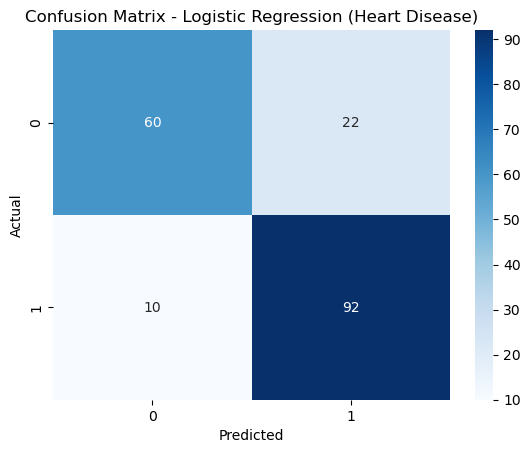

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Heart Disease)')
plt.savefig("/Users/manuelrodriguezsutil/Developer/health-risk/visuals/heart_disease/confusion_matrix.png", dpi=300)
plt.show()